In [ ]:
#1
import numpy as np
def hebbian(x,y,w,lr=0.1):
  return w+lr*np.outer(x,y)
def perceptron(x,y,w,lr=0.1):
  return w+lr*x*y if np.dot(w,x)*y <=0 else w
def delta(x,y,w,lr=0.1):
  return w+lr*(y-np.dot(w,x))*x
def correlation(x,y,w,lr=0.1):
  return w+lr*np.outer(x,y)
def outstar(x,y,w,lr=0.1):
  return w+lr*(y-np.dot(w,x))

x=np.array([1,-1,0,0.5])
y=1
w=np.array([0.2,-0.1,0.0,0.1])

heb=hebbian(x,y,w)
per=perceptron(x,y,w)
delt=delta(x,y,w)
corr=correlation(x,y,w)
out=outstar(x,y,w)
print("heb: ", heb)
print("per: ", per)
print("delt: ", delt)
print("corr: ", corr)
print("out: ", out)

heb:  [[ 0.3   0.    0.1   0.2 ]
 [ 0.1  -0.2  -0.1   0.  ]
 [ 0.2  -0.1   0.    0.1 ]
 [ 0.25 -0.05  0.05  0.15]]
per:  [ 0.2 -0.1  0.   0.1]
delt:  [ 0.265  -0.165   0.      0.1325]
corr:  [[ 0.3   0.    0.1   0.2 ]
 [ 0.1  -0.2  -0.1   0.  ]
 [ 0.2  -0.1   0.    0.1 ]
 [ 0.25 -0.05  0.05  0.15]]
out:  [ 0.265 -0.035  0.065  0.165]


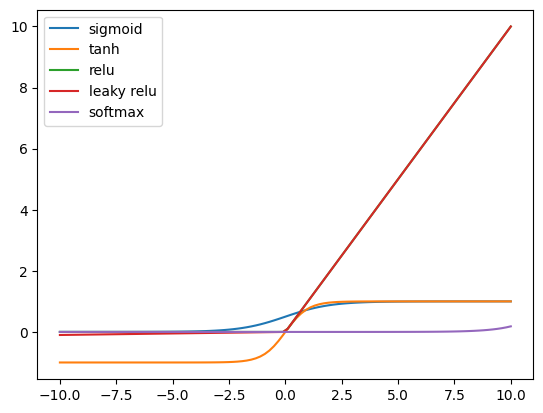

In [ ]:
#2
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-10,10,100)
plt.plot(x,1/(1+np.exp(-x)),label='sigmoid')
plt.plot(x,np.tanh(x),label='tanh')
plt.plot(x,np.maximum(0,x),label='relu')
plt.plot(x,np.where(x>0,x,x*0.01),label='leaky relu')
plt.plot(x,np.exp(x)/np.sum(np.exp(x)),label='softmax')
plt.legend()
plt.show()

In [ ]:
#3
def perceptron(inputs,weight,bias):
  activation=sum(i*w for i, w in zip(inputs,weight))+bias
  return 1 if activation>=0 else 0

inputs=[1,1,1]
weight=[0.2,0.4,0.2]
bias=-0.5

ex_output=1
output=perceptron(inputs,weight,bias)
accuracy = 100 if ex_output==output else 0
print("accuracy",accuracy)
print("output",output)

accuracy 100
output 1


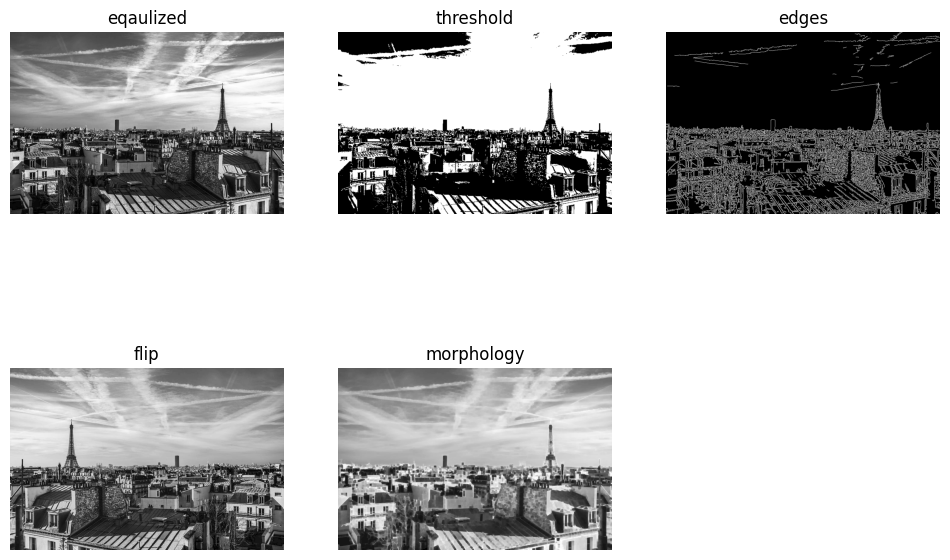

In [ ]:
#4
import numpy as np
import matplotlib.pyplot as plt
import cv2

image_path=('/content/image.png')
img=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)

functions={
    'eqaulized':cv2.equalizeHist(img),
    'threshold':cv2.threshold(img,128,255,cv2.THRESH_BINARY)[1],
    'edges':cv2.Canny(img,100,200),
    'flip':cv2.flip(img,1),
    'morphology':cv2.morphologyEx(img,cv2.MORPH_CLOSE,np.ones((5,5),np.uint8))
}

plt.figure(figsize=(12,8))
for i,(title,image) in enumerate (functions.items()):
  plt.subplot(2,3,i+1)
  plt.title(title)
  plt.imshow(image,cmap='gray')
  plt.axis('off')
plt.show()



In [11]:
#5
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow as tf

def load_image(path):
  img=cv2.imread(path)
  return cv2.cvtColor(img,cv2.COLOR_BGR2RGB)/255.0

content_image=load_image('/content/mnist_0.png')
styled_image=load_image('/content/image.png')

model=hub.load('https://www.kaggle.com/models/google/arbitrary-image-stylization-v1/TensorFlow1/256/2')

stylized_image=model(tf.constant(content_image[tf.newaxis,...],dtype=tf.float32),
                     tf.constant(cv2.resize(styled_image,(256,256))[tf.newaxis,...],dtype=tf.float32))[0]

plt.imshow(stylized_image[0].numpy())
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'tensorflow_hub'

170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/20
782/782 [==============================] - 6s 8ms/step - loss: 1.9295 - accuracy: 0.3213 - val_loss: 1.8141 - val_accuracy: 0.3639
Epoch 2/20
782/782 [==============================] - 10s 13ms/step - loss: 1.8446 - accuracy: 0.3601 - val_loss: 1.9480 - val_accuracy: 0.3221
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 1.8271 - accuracy: 0.3678 - val_loss: 1.7866 - val_accuracy: 0.3800
Epoch 4/20
782/782 [==============================] - 3s 3ms/step - loss: 1.8082 - accuracy: 0.3745 - val_loss: 1.9189 - val_accuracy: 0.3560
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 1.7828 - accuracy: 0.3835 - val_loss: 1.7874 - val_accuracy: 0.3810
Epoch 6/20
782/782 [==============================] - 3s 3ms/step - loss: 1.7762 - accuracy: 0.3865 - val_loss: 1.8442 - val_accuracy: 0.3501
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 1.773

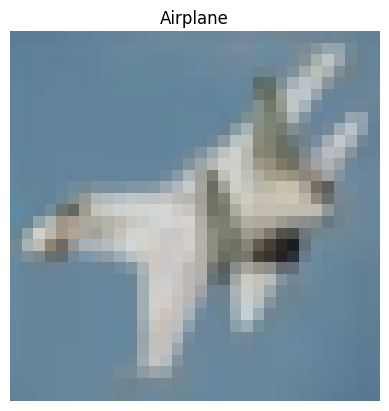

In [ ]:
#6
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
one_hot_encoder = OneHotEncoder()
y_train = one_hot_encoder.fit_transform(y_train).toarray()
y_test = one_hot_encoder.transform(y_test).toarray()

# Define and train model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Predict and display
new_image = np.expand_dims(x_test[10], axis=0)
pred = model.predict(new_image)
prediction = np.argmax(pred)

# Display image and prediction
plt.imshow(x_test[10])
plt.title(["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"][prediction])
plt.axis("off")
plt.show()


In [ ]:
#7
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
X_train,X_test=x_train/255.0,x_test/255.0
model=keras.models.Sequential([
    keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=1),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=1),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train.reshape((-1,28,28,1)),y_train,epochs=1,callbacks=[keras.callbacks.EarlyStopping(patience=2)])
model.evaluate(X_test.reshape(-1,28,28,1),y_test)

new_image=X_test[0]

plt.imshow(new_image)

plt.axis('off')
plt.show()
pred=model.predict(np.expand_dims(new_image,axis=1).reshape(-1,28,28,1))
prediction=np.argmax(pred)
class_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
print(f'prediction: {class_names[prediction]}\n actual value: {class_names[y_test[0]]}')

In [ ]:
#8
import numpy as np
import pandas as pd
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data=pd.read_csv('sonar.csv',header=None)
X=data.drop(60,axis=1)
y=pd.get_dummies(data[60],drop_first=True)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

model=keras.models.Sequential([
    keras.layers.Dense(60,input_dim=60,activation ='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100,batch_size=8,verbose=0)
model.evaluate=(X_test,y_test)

pred=np.round(model.predict(X_test).reshape(-1))
print("without droupout: ",classification_report(y_test,pred))

model=keras.models.Sequential([
    keras.layers.Dense(60,input_dim=60,activation ='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100,batch_size=8,verbose=0)
model.evaluate=(X_test,y_test)

pred=np.round(model.predict(X_test).reshape(-1))
print("with droupout: ",classification_report(y_test,pred))



In [ ]:
#9
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt
import numpy as np

def make_generator():
    return Sequential([
        layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, 5, strides=1, padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(64, 5, strides=2, padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(1, 5, strides=2, padding='same', use_bias=False, activation='tanh')
    ])

def make_discriminator():
    return Sequential([
        layers.Conv2D(64, 5, strides=2, padding='same', input_shape=(28, 28, 1)),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Conv2D(128, 5, strides=2, padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(1)
    ])

generator = make_generator()
discriminator = make_discriminator()

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
gen_opt = tf.keras.optimizers.Adam(1e-4)
disc_opt = tf.keras.optimizers.Adam(1e-4)

@tf.function
def train_step(images, batch_size=32):
    noise = tf.random.normal([batch_size, 100])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
        disc_loss = cross_entropy(tf.ones_like(real_output), real_output) + cross_entropy(tf.zeros_like(fake_output), fake_output)
    generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    gen_opt.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    disc_opt.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

# Load and preprocess the MNIST dataset
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize to [-1, 1]

batch_size = 256
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(60000).batch(batch_size)

# Training loop
epochs = 50
num_examples_to_generate = 16
seed = tf.random.normal([num_examples_to_generate, 100])

def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow((predictions[i, :, :, 0] + 1) / 2, cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

for epoch in range(epochs):
    for image_batch in train_dataset:
        train_step(image_batch)

    generate_and_save_images(generator, epoch + 1, seed)

generate_and_save_images(generator, epochs, seed)


In [12]:
#10
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential

(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

def load_model(use_batch_norm):
  model=Sequential([
      Flatten(input_shape=(28,28)),
      Dense(64,activation='relu' if not use_batch_norm else None),
      (BatchNormalization() if use_batch_norm else Dropout(0.2)),
      Dense(10,activation='sigmoid')
  ])

  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  model.fit(x_train,y_train,epochs=5,verbose=0)
  return model.evaluate(x_test,y_test,verbose=0)

print("dropout: ",load_model(use_batch_norm=False)[1])
print("Batch normalization: ",load_model(use_batch_norm=True)[1])



NameError: name 'keras' is not defined

In [ ]:
#12
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import numpy as np

# Load IMDB dataset (using top 5000 most frequent words)
vocab_size = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to have the same length
max_len = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

# Build GRU model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1, batch_size=64)

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Function to predict sentiment for a test sentence
def predict_sentiment(sentence):
    word_index = imdb.get_word_index()
    tokens = [word_index.get(word, 0) for word in sentence.lower().split()]
    tokens_padded = sequence.pad_sequences([tokens], maxlen=max_len)
    prediction = model.predict(tokens_padded)[0, 0]
    sentiment = 'positive' if prediction >= 0.5 else 'negative'
    return sentiment

# Test the model on a custom sentence
test_sentence = "The movie was very good and enjoyable"
print(f"Sentence: '{test_sentence}'")
print(f"Predicted Sentiment: {predict_sentiment(test_sentence)}")


In [10]:
import numpy as np
# creating an input array
a = np.array([[1, 2, 3, 4],[1, 32, 132, 3]])
print(a)
# getting the dimension of a 
print(a.shape)

# expanding the axis of a
b = np.expand_dims(a, axis=1)
print(b)
# getting the dimension of the new array
print(b.shape)

[[  1   2   3   4]
 [  1  32 132   3]]
(2, 4)
[[[  1   2   3   4]]

 [[  1  32 132   3]]]
(2, 1, 4)
